In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### training set

In [2]:
data=pd.read_csv('/home/changquan/code/SIIM-ISIC-Melanoma-Classification-1st-Place-Solution/data/jpeg-isic2019-768x768/train.csv')

In [5]:
data

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767
5,ISIC_0000006,-1,female,25.0,posterior torso,NV,benign,0,0,1022,767
6,ISIC_0000007,-1,female,25.0,posterior torso,NV,benign,0,16,1022,767
7,ISIC_0000008,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
8,ISIC_0000009,-1,female,30.0,anterior torso,NV,benign,0,8,1022,767
9,ISIC_0000010,-1,female,35.0,posterior torso,NV,benign,0,16,1022,767


/home/changquan/anaconda3/envs/isic/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/changquan/anaconda3/envs/isic/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'counts')

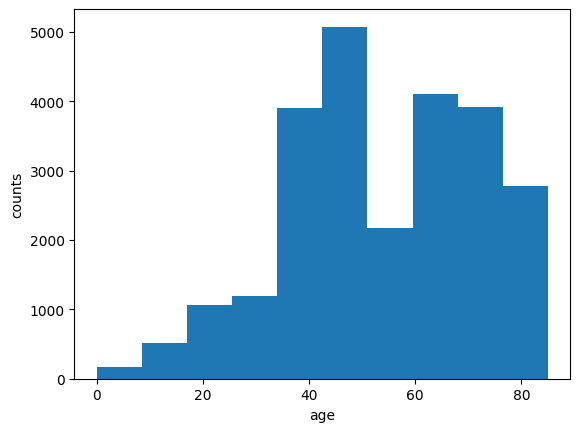

In [12]:
plt.hist(data['age_approx'])
plt.xlabel('age')
plt.ylabel('counts')

In [16]:
data['benign_malignant'].replace(['benign', 'malignant'],
                        [0, 1], inplace=True)

data['sex'].replace(['female', 'male'],
                        [0, 1], inplace=True)

In [33]:
data['benign_malignant'].value_counts()

benign       20809
malignant     4522
Name: benign_malignant, dtype: int64

In [34]:
data['sex'].value_counts()

male       13286
female     11661
unknown      384
Name: sex, dtype: int64

In [17]:
for i in range(len(data['image_name'])):
    if data['image_name'][i]=='ISIC_0073215':
        print(i)

25304


In [14]:
data['image_name']

0                    ISIC_0000000
1                    ISIC_0000001
2                    ISIC_0000002
3                    ISIC_0000003
4                    ISIC_0000004
5                    ISIC_0000006
6                    ISIC_0000007
7                    ISIC_0000008
8                    ISIC_0000009
9                    ISIC_0000010
10                   ISIC_0000011
11                   ISIC_0000012
12                   ISIC_0000013
13                   ISIC_0000014
14                   ISIC_0000015
15                   ISIC_0000016
16       ISIC_0000017_downsampled
17       ISIC_0000018_downsampled
18       ISIC_0000019_downsampled
19       ISIC_0000020_downsampled
20       ISIC_0000021_downsampled
21       ISIC_0000022_downsampled
22       ISIC_0000023_downsampled
23       ISIC_0000024_downsampled
24       ISIC_0000025_downsampled
25       ISIC_0000026_downsampled
26       ISIC_0000027_downsampled
27       ISIC_0000028_downsampled
28       ISIC_0000029_downsampled
29       ISIC_

#### testing set

In [3]:
data=pd.read_csv('/home/changquan/code/SIIM-ISIC-Melanoma-Classification-1st-Place-Solution/data/jpeg-melanoma-768x768/test.csv')

In [4]:
data

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,width,height
0,ISIC_0052060,IP_3579794,male,70.0,NaN,6000,4000
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,6000,4000
2,ISIC_0058510,IP_7960270,female,55.0,torso,6000,4000
3,ISIC_0073313,IP_6375035,female,50.0,torso,6000,4000
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,1920,1080
5,ISIC_0074618,IP_4438996,male,50.0,lower extremity,1872,1053
6,ISIC_0076801,IP_3110660,male,45.0,upper extremity,1872,1053
7,ISIC_0077586,IP_8578442,male,50.0,lower extremity,1920,1080
8,ISIC_0082004,IP_0817448,female,45.0,torso,1920,1080
9,ISIC_0082785,IP_3634181,male,65.0,lower extremity,6000,4000


Text(0, 0.5, 'counts')

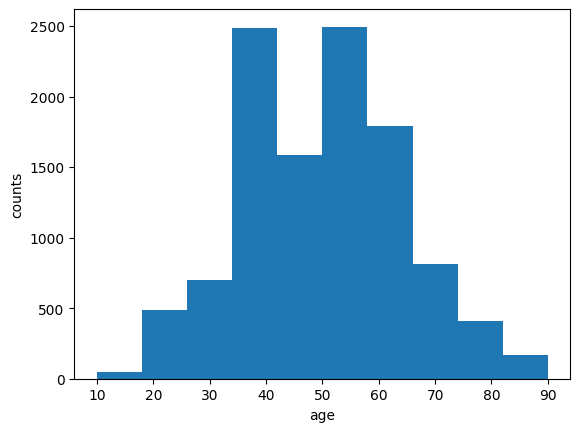

In [5]:
plt.hist(data['age_approx'])
plt.xlabel('age')
plt.ylabel('counts')

In [6]:
data['sex'].value_counts()

male      6255
female    4727
Name: sex, dtype: int64

#### prediction evaluation

In [49]:
data_test=pd.read_csv('/home/changquan/code/SIIM-ISIC-Melanoma-Classification-1st-Place-Solution/data/jpeg-melanoma-768x768/test.csv')
gt=pd.read_csv('/home/changquan/code/SIIM-ISIC-Melanoma-Classification-1st-Place-Solution/subs/submission96.csv')
predict=pd.read_csv('/home/changquan/code/SIIM-ISIC-Melanoma-Classification-1st-Place-Solution/subs/sub_9c_meta_b3_768_512_ext_18ep_best.csv')

In [43]:
import torch.nn as nn
import torch
criterion = nn.CrossEntropyLoss()

In [44]:
logits=predict['target']
target=gt['target']
# loss = criterion(logits, target)

In [48]:
from scipy.stats.stats import pearsonr

print('pearson correlation:', pearsonr(list(logits), list(target)))
print('mean abs error:', np.sum(np.abs(logits-target))/(len(logits)))
mean_ab_error=np.sum(np.abs(logits-target))/(len(logits))
print('accuracy:',1-mean_ab_error)


pearson correlation: (0.6279141657718743, 0.0)
mean abs error: 0.028446383356906437
accuracy: 0.9715536166430936


In [53]:
data['abs_error']=np.abs(logits-target)

Text(0, 0.5, 'Abs error')

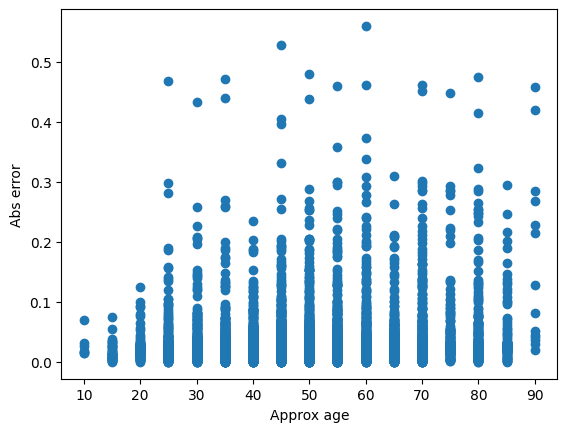

In [58]:
plt.scatter(data['age_approx'],data['abs_error'])
plt.xlabel('Approx age')
plt.ylabel('Abs error')

In [60]:
data['sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

Text(0, 0.5, 'Abs error')

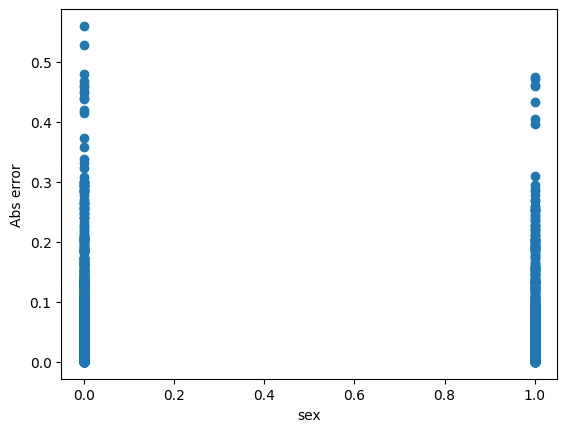

In [61]:
plt.scatter(data['sex'],data['abs_error'])
plt.xlabel('sex')
plt.ylabel('Abs error')